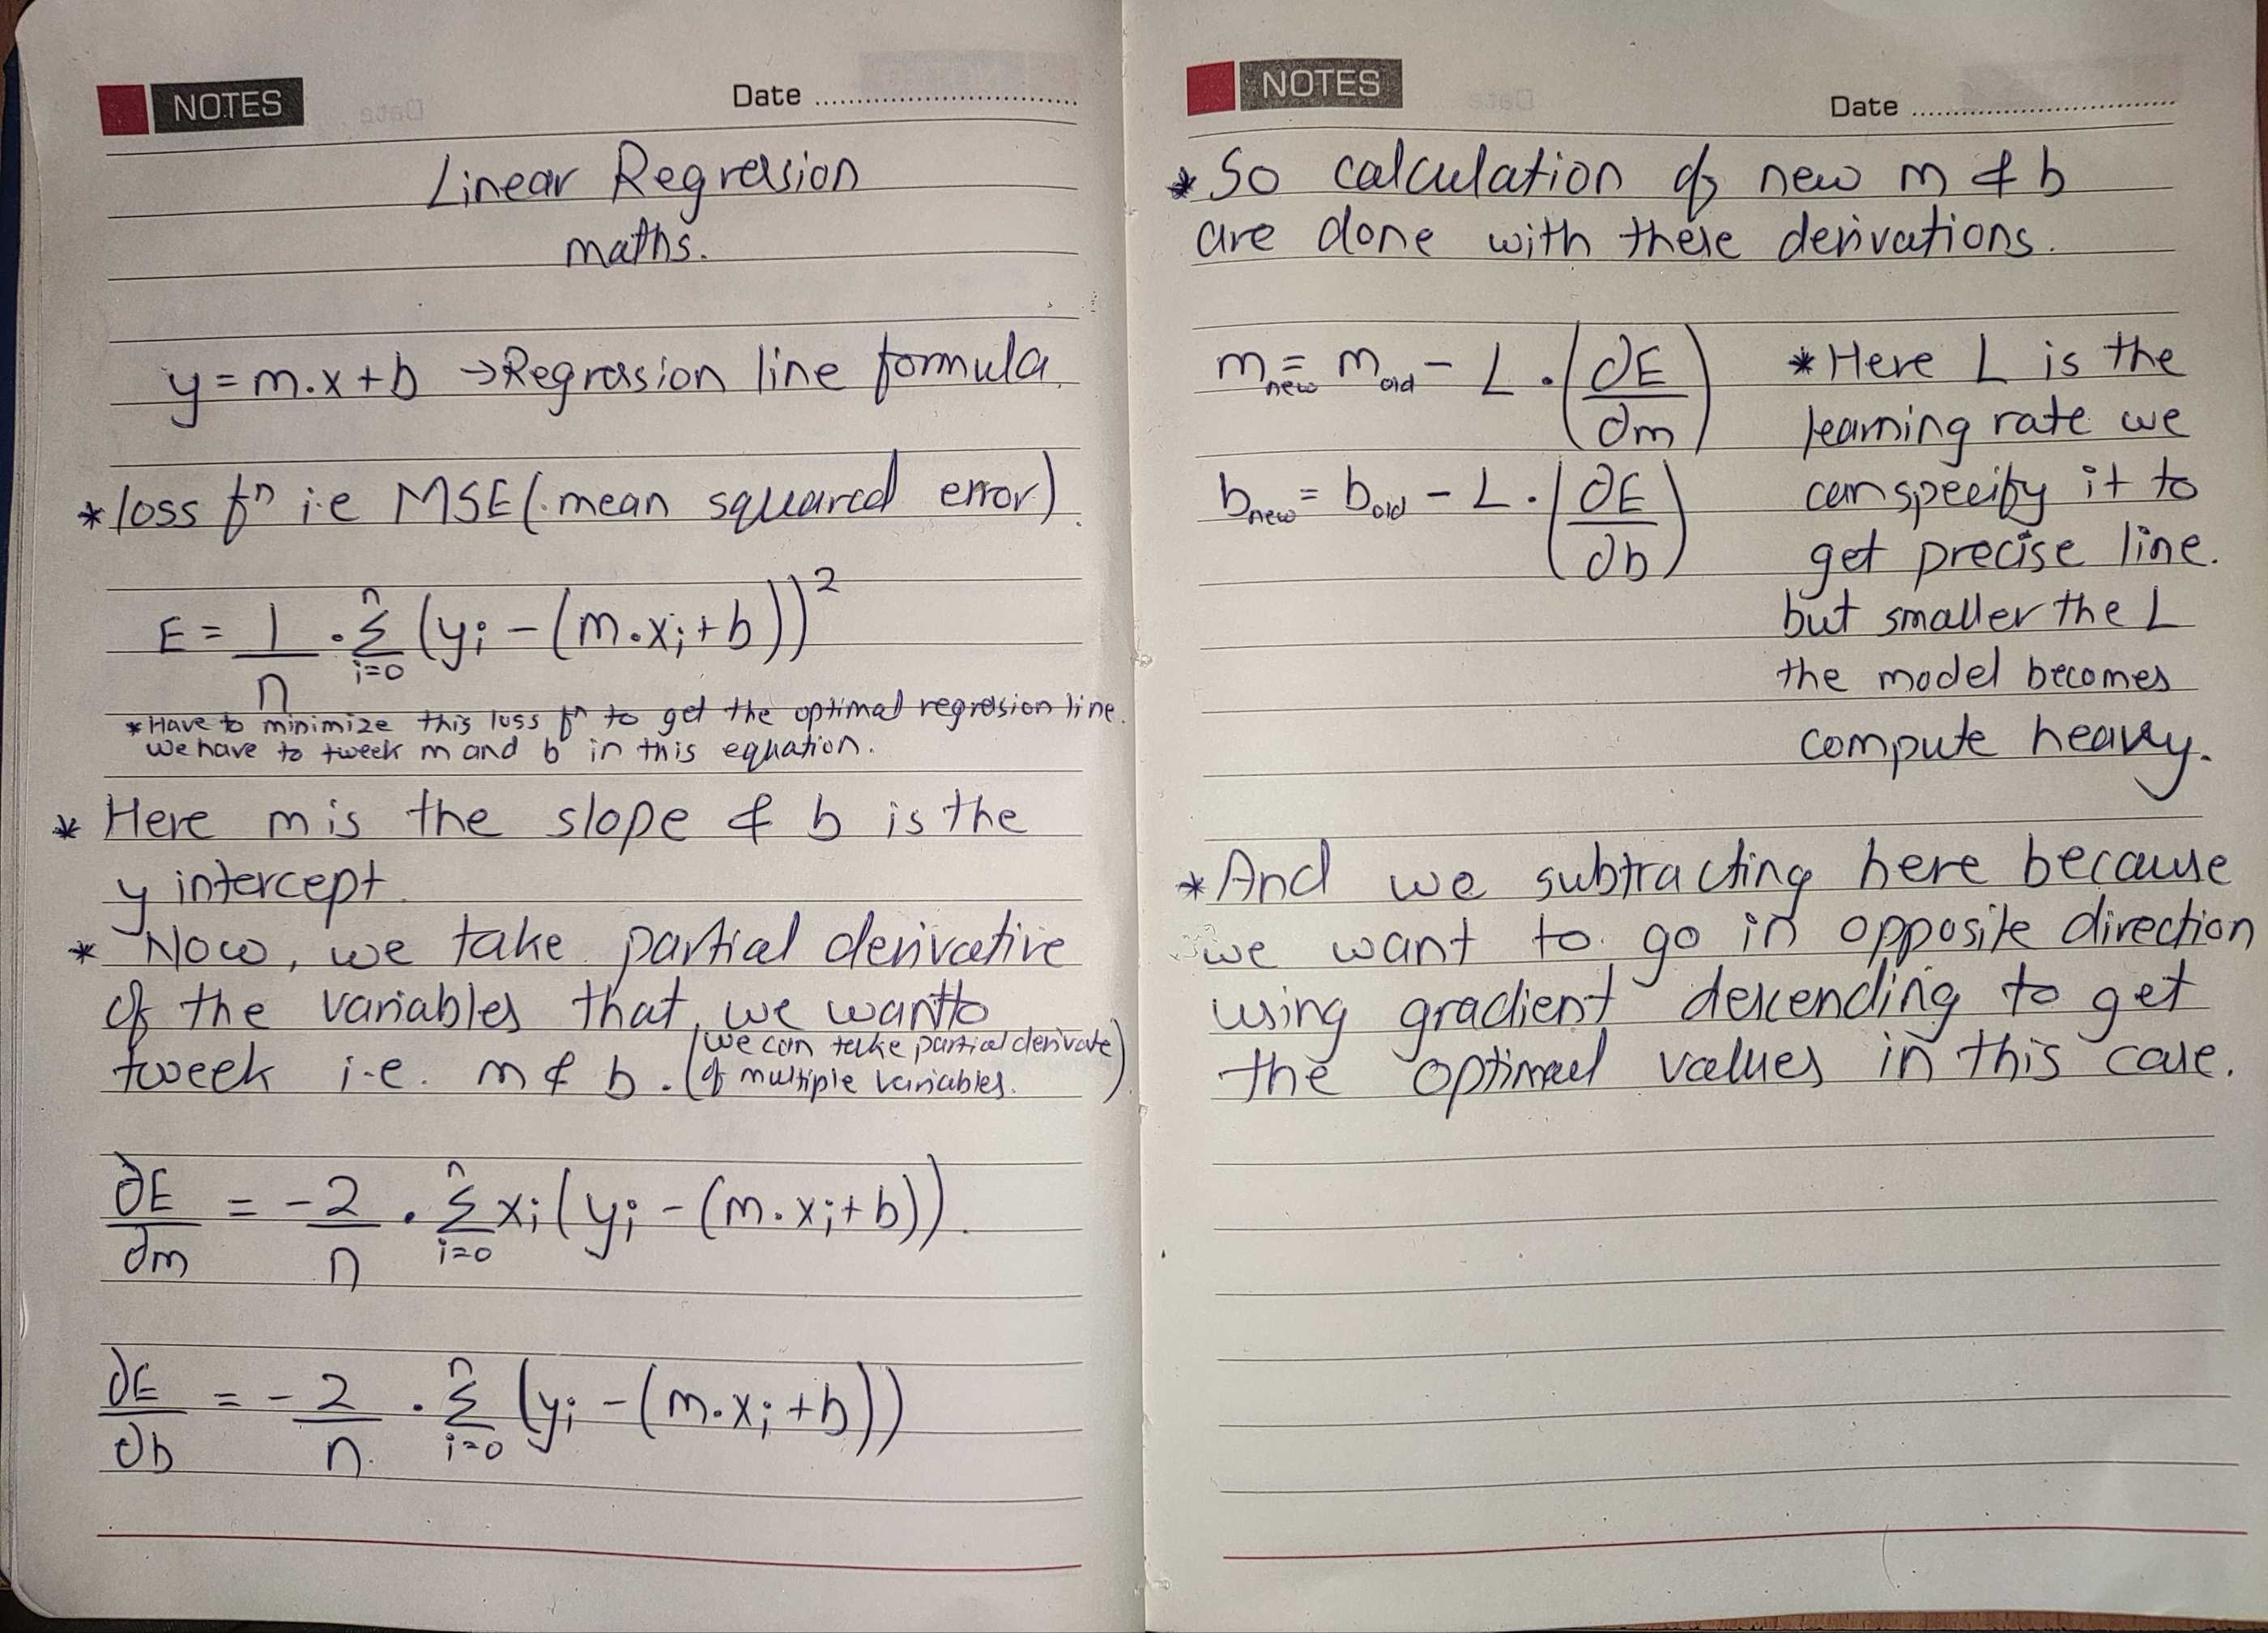

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

df = sns.load_dataset("tips")

In [67]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [68]:
df = df.drop(columns=['sex', 'smoker', 'day', 'time', 'size'])

[]

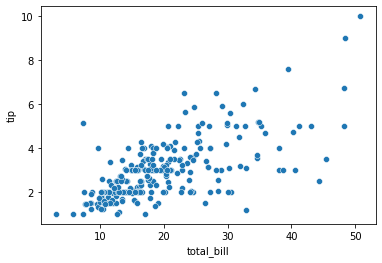

In [69]:
sns.scatterplot(data=df, x="total_bill", y="tip")
plt.plot()

In [70]:
df.head(2)

,total_bill,tip
0,16.99,1.01
1,10.34,1.66


In [71]:
# Only to calculate the loss function manually for given m & b
def mse_lossfn(m, b, data):
  total_error = 0
  n=len(df)

  for i in range(n):
    x = df.iloc[i].total_bill
    y = df.iloc[i].tip
    total_error += (y-(m*x+b))**2
    
  total_error /= float(len(df))
  print(total_error)

In [72]:
mse_lossfn(0.5,0,df)

60.8860388319672


In [73]:
# For fitting the line by adjusting m and b and minimizing the error
def gradient_desc(m_current, b_current, df, L):
  m_gradient = 0
  b_gradient = 0
  n=len(df)

  for i in range(n):
    x = df.iloc[i].total_bill
    y = df.iloc[i].tip
    m_gradient += -(2/n)*x*(y-(m_current*x+b_current)) 
    b_gradient += -(2/n)*(y-(m_current*x+b_current)) 
  
  m = m_current - L * m_gradient
  b = b_current - L * b_gradient
  return m, b

In [74]:
m = 0
b = 0
L = 0.0001
epochs = 500

for i in range(epochs):
  if i % 50 == 0:
    print(f"Epoch: {i}")
  m, b = gradient_desc(m, b, df, L)
print(m, b)

Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
Epoch: 300
Epoch: 350
Epoch: 400
Epoch: 450
0.14285272046775702 0.02122263710797794


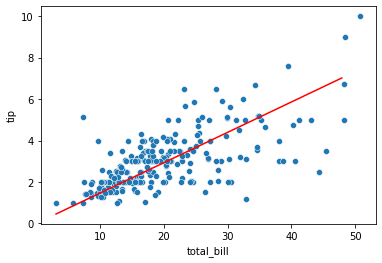

In [75]:
sns.scatterplot(data=df, x="total_bill", y="tip")

X_plot = np.linspace(df['total_bill'].min(), df['total_bill'].max())
Y_plot = [m * x + b for x in range(int(df['total_bill'].min()), int(df['total_bill'].max()))]

plt.plot(X_plot[:47], Y_plot, color='r')
plt.show()